## BANK CUSTOMER CHURN PREDICTION

In [70]:
import pandas as pd


In [71]:
df=pd.read_csv('Churn_Modelling.csv')



## Display Top 5 Rows of The Dataset

In [72]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Find Shape of Our Dataset(number of row and columns)

In [73]:
df.shape

(10000, 14)

## Check Null Values In The Dataset

In [74]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [74]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [75]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

## Droping Irrelevent Features

In [76]:
df.drop(columns=['RowNumber','CustomerId','Surname',],axis=1,inplace=True)

In [77]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Encode The Dataset Into The LabelEncoder

In [78]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [79]:
df['Geography']=encoder.fit_transform(df['Geography'])
df['Gender']=encoder.fit_transform(df['Gender'])


In [80]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [81]:
df=pd.get_dummies(df,columns=['Geography'],drop_first=True)

In [82]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,0


In [83]:
x=df.drop(columns=['Exited'],axis=1).values
y=df['Exited'].values

In [84]:
x

array([[6.1900000e+02, 0.0000000e+00, 4.2000000e+01, ..., 1.0134888e+05,
        0.0000000e+00, 0.0000000e+00],
       [6.0800000e+02, 0.0000000e+00, 4.1000000e+01, ..., 1.1254258e+05,
        0.0000000e+00, 1.0000000e+00],
       [5.0200000e+02, 0.0000000e+00, 4.2000000e+01, ..., 1.1393157e+05,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [7.0900000e+02, 0.0000000e+00, 3.6000000e+01, ..., 4.2085580e+04,
        0.0000000e+00, 0.0000000e+00],
       [7.7200000e+02, 1.0000000e+00, 4.2000000e+01, ..., 9.2888520e+04,
        1.0000000e+00, 0.0000000e+00],
       [7.9200000e+02, 0.0000000e+00, 2.8000000e+01, ..., 3.8190780e+04,
        0.0000000e+00, 0.0000000e+00]])

In [85]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

## Feature Scaling

In [86]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [87]:
x=scaler.fit_transform(x)

In [88]:
x

array([[-0.32622142, -1.09598752,  0.29351742, ...,  0.02188649,
        -0.57873591, -0.57380915],
       [-0.44003595, -1.09598752,  0.19816383, ...,  0.21653375,
        -0.57873591,  1.74273971],
       [-1.53679418, -1.09598752,  0.29351742, ...,  0.2406869 ,
        -0.57873591, -0.57380915],
       ...,
       [ 0.60498839, -1.09598752, -0.27860412, ..., -1.00864308,
        -0.57873591, -0.57380915],
       [ 1.25683526,  0.91241915,  0.29351742, ..., -0.12523071,
         1.72790383, -0.57380915],
       [ 1.46377078, -1.09598752, -1.04143285, ..., -1.07636976,
        -0.57873591, -0.57380915]])

## Splitting The Dataset Into The Training Set And Test Set 

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


## Tensorflow

In [122]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [123]:
model=Sequential()

In [124]:
x.shape

(10000, 11)

In [125]:
model.add(Dense(11,activation='relu',input_dim=x_train.shape[1]))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [126]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 11)                132       
                                                                 
 dense_8 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [127]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [128]:
history= model.fit(x_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 2s 5ms/step - loss: 0.5650 - accuracy: 0.7350 - val_loss: 0.4779 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4579 - accuracy: 0.7958 - val_loss: 0.4543 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4422 - accuracy: 0.7961 - val_loss: 0.4452 - val_accuracy: 0.7975
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4330 - accuracy: 0.7991 - val_loss: 0.4380 - val_accuracy: 0.8025
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4248 - accuracy: 0.8086 - val_loss: 0.4314 - val_accuracy: 0.8081
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4176 - accuracy: 0.8178 - val_loss: 0.4240 - val_accuracy: 0.8188
Epoch 7/100
128/128 [==============================] - 0s 4ms/step - loss: 0.4110 - accuracy: 0.8194 - val_loss: 0.4169 - val_accuracy: 0.8244

In [129]:
y_pred_probs = model.predict(x_test)
y_pred = y_pred_probs.argmax(axis=-1)

63/63 [==============================] - 0s 1ms/step


In [130]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

In [131]:
import matplotlib.pyplot as plt

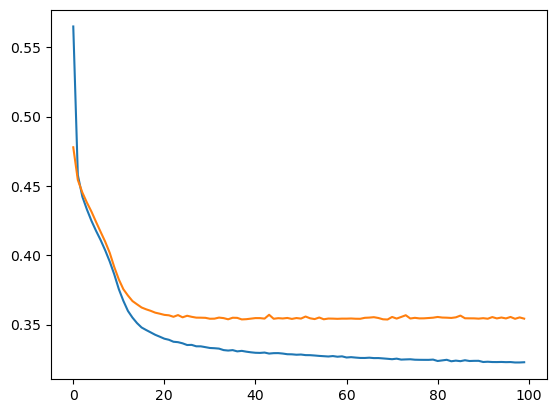

In [133]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

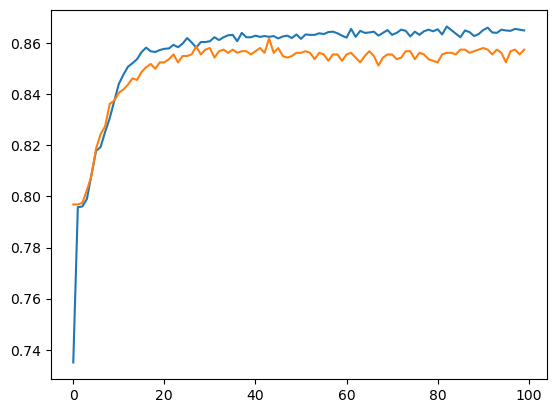

In [134]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])